In [1]:
import numpy as np
import pandas as pd

data = pd.DataFrame(data=pd.read_csv('data1.csv'))

concepts = np.array(data.iloc[:,0:-1])
print(concepts)

target = np.array(data.iloc[:,-1])
print(target)

def learn(concepts, target):
    specific_h = concepts[0].copy()

    for i, h in enumerate(concepts):
        if target[i] == "Yes":
            for x in range(len(specific_h)):
                if h[x] != specific_h[x]:

                    specific_h[x] = "?"
    return specific_h

specific_h = learn(concepts, target)
print(specific_h)


[['Sunny' 'Warm' 'Normal' 'Strong' 'Warm' 'Same']
 ['Sunny' 'Warm' 'High' 'Strong' 'Warm' 'Same']
 ['Rainy' 'Cold' 'High' 'Strong' 'Warm' 'Change']
 ['Sunny' 'Warm' 'High' 'Strong' 'Cool' 'Change']]
['Yes' 'Yes' 'No' 'Yes']
['Sunny' 'Warm' '?' 'Strong' '?' '?']


In [2]:
import numpy as np
import pandas as pd

data = pd.DataFrame(data=pd.read_csv('data2.csv'))
print('The Dataset is: \n')
print(data)

concepts = np.array(data.iloc[:,0:-1])

print('\n The Concepts are: \n',concepts)
target = np.array(data.iloc[:,-1])
print('\nThe target is: \n',target)

def learn(concepts, target):
    specific_h = concepts[0].copy()
    general_h = [["?" for i in range(len(specific_h))] for i in range(len(specific_h))]
    for i, h in enumerate(concepts):
        if target[i] == "Yes":
            for x in range(len(specific_h)):
                if h[x] != specific_h[x]:
                    specific_h[x] = '?'
                    general_h[x][x] = '?'


        if target[i] == "No":
            for x in range(len(specific_h)):
                if h[x] != specific_h[x]:
                    general_h[x][x] = specific_h[x]
                else:
                    general_h[x][x] = '?'

    indices = [i for i,val in enumerate(general_h) if val == ['?', '?', '?', '?', '?', '?']]

    for i in indices:
        general_h.remove(['?', '?', '?', '?', '?', '?'])

    return specific_h, general_h

s_final, g_final = learn(concepts, target)
print("\n\nFinal S:", s_final)
print("\n\nFinal G:", g_final)


The Dataset is: 

     Sky Airtemp Humidity    Wind Water Forecast EnjoySport
0  Sunny    Warm   Normal  Strong  Warm     Same        Yes
1  Sunny    Warm     High  Strong  Warm     Same        Yes
2  Rainy    Cold     High  Strong  Warm   Change         No
3  Sunny    Warm     High  Strong  Cool   Change        Yes

 The Concepts are: 
 [['Sunny' 'Warm' 'Normal' 'Strong' 'Warm' 'Same']
 ['Sunny' 'Warm' 'High' 'Strong' 'Warm' 'Same']
 ['Rainy' 'Cold' 'High' 'Strong' 'Warm' 'Change']
 ['Sunny' 'Warm' 'High' 'Strong' 'Cool' 'Change']]

The target is: 
 ['Yes' 'Yes' 'No' 'Yes']


Final S: ['Sunny' 'Warm' '?' 'Strong' '?' '?']


Final G: [['Sunny', '?', '?', '?', '?', '?'], ['?', 'Warm', '?', '?', '?', '?']]


In [3]:
import pandas as pd
import numpy as np
from pprint import pprint

dataset = pd.read_csv('data3.csv')
features=['Outlook','Temperature','Humidity','Wind']
def entropy(target_col):
    elements,counts = np.unique(target_col,return_counts = True)
    entropy = np.sum([(-counts[i]/np.sum(counts))*np.log2(counts[i]/np.sum(counts)) for i in range(len(elements))])
    return entropy

def InfoGain(data,split_attribute_name,target_name="EnjoySport"):
     total_entropy = entropy(data[target_name])
     vals,counts= np.unique(data[split_attribute_name],return_counts=True)
     Weighted_Entropy = np.sum([(counts[i]/np.sum(counts))*entropy(data.where(data[split_attribute_name]==vals[i]).dropna()[target_name]) for i in range(len(vals))])
     Information_Gain = total_entropy - Weighted_Entropy
     return Information_Gain

def ID3(data,originaldata,features,target_attribute_name="class",parent_node_class = None):

    if len(np.unique(data[target_attribute_name])) <= 1:
        return np.unique(data[target_attribute_name])[0]

    elif len(data)==0:
        return np.unique(originaldata[target_attribute_name])[np.argmax(np.unique(originaldata[target_attribute_name],return_counts=True)[1])]

    elif len(features) ==0:
        return parent_node_class

    else:
        parent_node_class = np.unique(data[target_attribute_name])[np.argmax(np.unique(data[target_attribute_name],return_counts=True)[1])]
        item_values = [InfoGain(data,feature,target_attribute_name) for feature in features]
        best_feature_index = np.argmax(item_values)
        best_feature = features[best_feature_index]
        tree = {best_feature:{}}
        features = [i for i in features if i != best_feature]
        for value in np.unique(data[best_feature]):
            value = value
            sub_data = data.where(data[best_feature] == value).dropna()
            subtree = ID3(sub_data,dataset,features,target_attribute_name,parent_node_class)
            tree[best_feature][value] = subtree

        return(tree)

def predict(query,tree,default = 1):

    for key in list(query.keys()):
        if key in list(tree.keys()):
            try:
                result = tree[key][query[key]]
            except:
                return default
            result = tree[key][query[key]]
            if isinstance(result,dict):
                return predict(query,result)
            else:
                return result

training_data = dataset.iloc[:13]
print(training_data)

features=['Outlook','Temperature','Humidity','Wind']
target_attribute_name="class"
parent_node_class=None
tree=ID3(training_data,training_data,features,target_attribute_name,parent_node_class)
pprint(tree)

query=dataset.iloc[:,:-1].to_dict(orient="records")
result=predict(query[10],tree,1.0)
print(result)


     Outlook Temperature Humidity    Wind class
0      Sunny         Hot     High    Weak    No
1      Sunny         Hot     High  Strong    No
2   Overcast         Hot     High    Weak   Yes
3       Rain        Mild     High    Weak   Yes
4       Rain        Cool   Normal    Weak   Yes
5       Rain        Cool   Normal  Strong    No
6   Overcast        Cool   Normal  Strong   Yes
7      Sunny        Mild     High    Weak    No
8      Sunny        Cool   Normal    Weak   Yes
9       Rain        Mild   Normal    Weak   Yes
10     Sunny        Mild   Normal  Strong   Yes
11  Overcast        Mild     High  Strong   Yes
12  Overcast         Hot   Normal    Weak   Yes
{'Outlook': {'Overcast': 'Yes',
             'Rain': {'Wind': {'Strong': 'No', 'Weak': 'Yes'}},
             'Sunny': {'Humidity': {'High': 'No', 'Normal': 'Yes'}}}}
Yes


In [4]:
import numpy as np
X = np.array(([2, 9], [1, 5], [3, 6]), dtype=float)
y = np.array(([92], [86], [89]), dtype=float)
X = X/np.amax(X,axis=0)
y = y/100
def sigmoid (x):

    return 1/(1 + np.exp(-x))

def derivatives_sigmoid(x):

    return x * (1 - x)

epoch=7000 #Setting training iterations

lr=0.1 #Setting learning rate
inputlayer_neurons = 2 #number of features in data set
hiddenlayer_neurons = 3 #number of hidden layers neurons
output_neurons = 1 #number of neurons at output layer
wh=np.random.uniform(size=(inputlayer_neurons,hiddenlayer_neurons))
bh=np.random.uniform(size=(1,hiddenlayer_neurons))
wout=np.random.uniform(size=(hiddenlayer_neurons,output_neurons))
bout=np.random.uniform(size=(1,output_neurons))
for i in range(epoch):
    h_ip=np.dot(X,wh) + bh
    h_act = sigmoid(h_ip)
    o_ip=np.dot(h_act,wout) + bout
    output = sigmoid(o_ip)
    EO = y-output
    outgrad = derivatives_sigmoid(output)
    d_output = EO* outgrad
    Eh = d_output.dot(wout.T)
    hiddengrad = derivatives_sigmoid(h_act)
    d_hidden = Eh * hiddengrad
    wout += h_act.T.dot(d_output) *lr
    wh += X.T.dot(d_hidden) *lr

print("Input: \n" + str(X))
print("Actual Output: \n" + str(y))
print("Learned Output: \n" ,output)


Input: 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]
Actual Output: 
[[0.92]
 [0.86]
 [0.89]]
Learned Output: 
 [[0.89185128]
 [0.88382466]
 [0.89471646]]


In [5]:
import pandas as pd
import numpy as np
import csv

#reading the CSV file
data1 = pd.read_csv('data5.csv')

#Separating all Yes in one Dataframe
df1 = data1[data1['class'] == 'Yes']

#Separating all No in one Dataframe
df2 = data1[data1['class'] == 'No']

#Declaring list variable for storing the input from the user
inputlist1=[]

#Initializing the Header value in head list
head=['Outlook','Temperature','Humidity','Wind','class']
inputlist1.append(head)
count=0

def counting(inputlist1,j,str1,count):
    if(inputlist1[j][4]==str1):
        count=count+1
    return count

print("\n\t\t Naive Bayesian Classifier")

with open('data5.csv','r') as csv_file1:
              csv_reader1=csv.reader(csv_file1)
              for i in range(11):
                  next(csv_reader1)
              for line1 in csv_reader1:
                  inputlist1.append(line1)
              for j in range(1,len(inputlist1)):
                  print("\nThe ",j,"Test data is:\n",head[0]," = ",inputlist1[j][0],", ",head[1]," = ",inputlist1[j][1],", ",head[2]," = ",inputlist1[j][2],", ",head[3]," = ",inputlist1[j][3])

                  #Declaring list variable for storing the result
                  listyes=list()
                  listno=list()
                  resultyes=0.0
                  resultno=0.0

                  #Evaluating the Probability
                  for d in range(4):
                      listyes.append(df1.loc[df1[head[d]]==inputlist1[j][d],head[d]].count()/len(df1))
                      listno.append(df2.loc[df2[head[d]]==inputlist1[j][d],head[d]].count()/len(df2))
                  resultyes = np.prod(np.array(listyes))*(len(df1)/len(data1))
                  resultno = np.prod(np.array(listno))*(len(df2)/len(data1))
                  print("Probability of Yes: ",resultyes,"\nProbability of No: ",resultno)
                  if resultyes>resultno:
                     print("Classified as YES\n")
                     count=counting(inputlist1,j,'Yes',count)
                  else:
                     print("Classified as NO\n")
                     count=counting(inputlist1,j,'No',count)

print("\nAccuracy of the Classifier is: ",count/(len(inputlist1)-1) )



		 Naive Bayesian Classifier

The  1 Test data is:
 Outlook  =  Sunny ,  Temperature  =  Mild ,  Humidity  =  Normal ,  Wind  =  Strong
Probability of Yes:  0.014109347442680773 
Probability of No:  0.010285714285714285
Classified as YES


The  2 Test data is:
 Outlook  =  Overcast ,  Temperature  =  Mild ,  Humidity  =  High ,  Wind  =  Strong
Probability of Yes:  0.014109347442680773 
Probability of No:  0.0
Classified as YES


The  3 Test data is:
 Outlook  =  Overcast ,  Temperature  =  Hot ,  Humidity  =  Normal ,  Wind  =  Weak
Probability of Yes:  0.028218694885361547 
Probability of No:  0.0
Classified as YES


The  4 Test data is:
 Outlook  =  Rain ,  Temperature  =  Mild ,  Humidity  =  High ,  Wind  =  Strong
Probability of Yes:  0.010582010582010581 
Probability of No:  0.027428571428571438
Classified as NO


Accuracy of the Classifier is:  1.0


In [6]:
import pandas as pd
msg=pd.read_csv('data6.csv',names=['message','label'])
print('\n Total instances in the dataset: ',msg.shape[0])
msg['labelnum']=msg.label.map({'pos':1,'neg':0})
x=msg.message
y=msg.labelnum

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y)

print('\n Dataset is Split into Training and Testing Samples')
print('\n Training Instances: ',xtrain.shape[0])
print(xtrain)
print('\n Testing Instances :',xtest.shape[0])
print(xtest)

from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
xtrain_dtm = count_vect.fit_transform(xtrain)
xtest_dtm = count_vect.transform(xtest)
print('\n Total features extracted using CountVectorizer: ',xtrain_dtm.shape[1])

print('\n Features for first 5 training instances are listed below')
df = pd.DataFrame(xtrain_dtm.toarray(),columns=count_vect.get_feature_names())
print(df[0:5])

from sklearn.naive_bayes import MultinomialNB
clf=MultinomialNB().fit(xtrain_dtm,ytrain)
predicted=clf.predict(xtest_dtm)

print('\nClassification Results of Test Dataset are:\n')
for doc, p in zip(xtest,predicted):
    pred = 'pos' if p==1 else 'neg'
    print('%s -->  %s '%(doc,pred))

from sklearn import metrics
print('\nAccuracy of the classifier is',metrics.accuracy_score(ytest,predicted))
print('\nConfusion Matrix')
print(metrics.confusion_matrix(ytest,predicted))
print('\nRecall and Precision')
print(metrics.recall_score(ytest,predicted))
print(metrics.precision_score(ytest,predicted))



 Total instances in the dataset:  18

 Dataset is Split into Training and Testing Samples

 Training Instances:  13
11    I do not like the taste of this juice
9                       My boss is horrible
12                          I love to dance
13        I am sick and tired of this place
14                     What a great holiday
10                 This is an awesome place
7                    I can't deal with this
4                      What an awesome view
17        I went to my enemey's house today
6                  I am tired of this stuff
16           We will have good fun tomorrow
8                      He is my sworn enemy
1                  This is an amazing place
Name: message, dtype: object

 Testing Instances : 5
2     I feel very good about these places
5           I do not like this restaurant
15         That is a bad locality to stay
3                    This is my best work
0                    I love this sandwich
Name: message, dtype: object

 Total features ex

In [9]:
import numpy as np
import pandas as pd
import csv
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.models import BayesianModel
from pgmpy.inference import VariableElimination

#Read the attributes
lines = list(csv.reader(open('data7_names.csv', 'r')));
attributes = lines[0]

#Read Cleveland Heart dicease data
heartDisease = pd.read_csv('data7_heart.csv', names = attributes)
heartDisease = heartDisease.replace('?', np.nan)

# Model Baysian Network
model = BayesianModel([('age', 'trestbps'), ('age', 'fbs'), ('sex', 'trestbps'), ('sex', 'trestbps'),
('exang', 'trestbps'),('trestbps','heartdisease'),('fbs','heartdisease'),
('heartdisease','restecg'),('heartdisease','thalach'),('heartdisease','chol')])


print('\nBayesian Network Nodes are: ')
print('\t',model.nodes())
print('\nBayesian Network Edges are:')
print('\t',model.edges())


# Learning CPDs using Maximum Likelihood Estimators
print('\nLearning CPDs using Maximum Likelihood Estimators...');
model.fit(heartDisease, estimator=MaximumLikelihoodEstimator)

# Inferencing with Bayesian Network
print('\nInferencing with Bayesian Network:')
HeartDisease_infer = VariableElimination(model)

# Computing the probability of bronc given smoke.
print('\n1.Probability of HeartDisease given Age=28')
q = HeartDisease_infer.query(variables=['heartdisease'], evidence={'age': 28})
print(q['heartdisease'])
print('\n2. Probability of HeartDisease given chol (Cholestoral) =100')
q = HeartDisease_infer.query(variables=['heartdisease'], evidence={'chol': 100})
print(q['heartdisease'])



Bayesian Network Nodes are: 
	 ['age', 'trestbps', 'fbs', 'sex', 'exang', 'heartdisease', 'restecg', 'thalach', 'chol']

Bayesian Network Edges are:
	 [('age', 'trestbps'), ('age', 'fbs'), ('trestbps', 'heartdisease'), ('fbs', 'heartdisease'), ('sex', 'trestbps'), ('exang', 'trestbps'), ('heartdisease', 'restecg'), ('heartdisease', 'thalach'), ('heartdisease', 'chol')]

Learning CPDs using Maximum Likelihood Estimators...

Inferencing with Bayesian Network:

1.Probability of HeartDisease given Age=28
╒════════════════╤═════════════════════╕
│ heartdisease   │   phi(heartdisease) │
╞════════════════╪═════════════════════╡
│ heartdisease_0 │              0.6791 │
├────────────────┼─────────────────────┤
│ heartdisease_1 │              0.1212 │
├────────────────┼─────────────────────┤
│ heartdisease_2 │              0.0810 │
├────────────────┼─────────────────────┤
│ heartdisease_3 │              0.0939 │
├────────────────┼─────────────────────┤
│ heartdisease_4 │              0.0247 │
╘

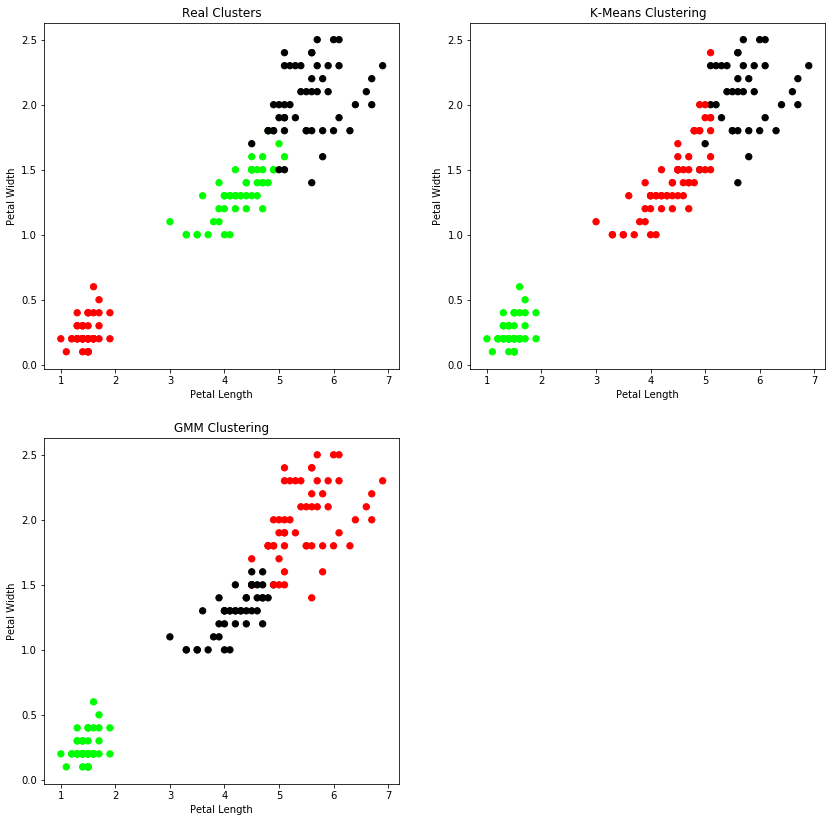

Observation: The GMM using EM algorithm based clustering matched the
 true labels more closely than the Kmeans.


In [15]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np

iris = datasets.load_iris()
X = pd.DataFrame(iris.data)
X.columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']
y = pd.DataFrame(iris.target)
y.columns = ['Targets']
model = KMeans(n_clusters=3)
model.fit(X)

plt.figure(figsize=(14,14))
colormap = np.array(['red', 'lime', 'black'])

plt.subplot(2, 2, 1)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[y.Targets], s=40)
plt.title('Real Clusters')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

plt.subplot(2, 2, 2)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[model.labels_], s=40)
plt.title('K-Means Clustering')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')


from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
scaler.fit(X)
xsa = scaler.transform(X)
xs = pd.DataFrame(xsa, columns = X.columns)
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3)
gmm.fit(xs)
gmm_y = gmm.predict(xs)
plt.subplot(2, 2, 3)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[gmm_y], s=40)
plt.title('GMM Clustering')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()

print('Observation: The GMM using EM algorithm based clustering matched the')
print(' true labels more closely than the Kmeans.')


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix

from sklearn import datasets
iris=datasets.load_iris()
iris_data=iris.data
iris_labels=iris.target

x_train,x_test,y_train,y_test=train_test_split(iris_data,iris_labels,test_size=0.20)

classifier=KNeighborsClassifier(5)
classifier.fit(x_train,y_train)

y_pred=classifier.predict(x_test)

print('Confusion Matrix is as follows')
print(confusion_matrix(y_test,y_pred))
print('Accuracy Metrics')
print(classification_report(y_test,y_pred))


Confusion Matrix is as follows
[[15  0  0]
 [ 0  6  0]
 [ 0  1  8]]
Accuracy Metrics
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        15
          1       0.86      1.00      0.92         6
          2       1.00      0.89      0.94         9

avg / total       0.97      0.97      0.97        30



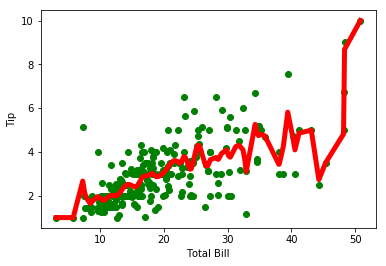

In [5]:
from numpy import *
import operator
from os import listdir
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy.linalg
from scipy.stats.stats import pearsonr


def kernel(point,xmat,k):
    m,n= shape(xmat)
    weights=mat(eye((m)))
    for j in range(m):
        diff = point - X[j]
        weights[j,j]= exp(diff*diff.T/(-2*k**2))
    return weights

def localWeight(point,xmat,ymat,k):
    wei=kernel(point,xmat,k)
    W=(X.T*(wei*X)).I*(X.T*(wei*ymat.T))
    return W

def localWeightRegression(xmat,ymat,k):
    m,n=shape(xmat)
    ypred=zeros(m)
    for i in range(m):
        ypred[i]=xmat[i]*localWeight(xmat[i],xmat,ymat,k)
    return ypred

#load data points
data=pd.read_csv('data10.csv')
bill=array(data.totbill)
tip=array(data.tip)

#Preparing and add 1 in bill
mbill=mat(bill)
mtip=mat(tip)
m=shape(mbill)[1]
one=mat(ones(m))
X=hstack((one.T,mbill.T))

#set k here
ypred=localWeightRegression(X,mtip,0.5)
SortIndex=X[:,1].argsort(0)
xsort=X[SortIndex][:,0]
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.scatter(bill,tip,color='green')
ax.plot(xsort[:,1],ypred[SortIndex],color='red',linewidth=5)
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.show()
